In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("vgsales.csv").copy()

In [3]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [5]:
#remove 271 rows which not contain year value because in our topic year is most important for compareing trends over time
df = df.dropna(subset=['Year'])

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


In [7]:
df['Year'] = df['Year'].astype(int).copy()

In [8]:
print(df['Year'].dtype)

int32


In [9]:
#convert (YEAR) from float to int 
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000   
mean    8292.868194   2006.406443      0.265415      0.147554      0.078661   
std     4792.669778      5.828981      0.821591      0.508766      0.311557   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4136.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8295.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12441.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16327.000000  16327.000000  
mean       0.048325      0.540232  
std        0.189885      1.565732  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


In [10]:
print(df.isnull().sum())

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [11]:
df['Publisher'].isna().sum()

36

In [12]:
# so 36 values of publisher is empty
# as we have total 16327 rows so drop 36 made 0.22 difference which is very minimal for analysis
df = df.dropna(subset=['Publisher'])

In [13]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [14]:
df.duplicated().sum()

0

In [15]:
# now we have a clear data without missing values and with proper data type and without duplication
# so now we remove irrelevant Columns such as Rank 
df = df.drop(['Rank'], axis=1)

In [16]:
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [17]:
df['Global_Sales'].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

In [18]:
# made pivote table which contain year and total sales made by this year for selling all genre to create better visual
pivot_table_year = df.pivot_table(index='Year', values='Global_Sales', aggfunc='sum')

In [19]:
print(pivot_table_year)

      Global_Sales
Year              
1980         11.38
1981         35.77
1982         28.86
1983         16.79
1984         50.36
1985         53.94
1986         37.07
1987         21.74
1988         47.22
1989         73.45
1990         49.39
1991         32.23
1992         76.16
1993         45.98
1994         79.17
1995         88.11
1996        199.15
1997        200.98
1998        256.47
1999        251.27
2000        201.56
2001        331.47
2002        395.52
2003        357.85
2004        414.01
2005        458.51
2006        521.04
2007        609.92
2008        678.90
2009        667.30
2010        600.29
2011        515.80
2012        363.49
2013        368.11
2014        337.03
2015        264.44
2016         70.90
2017          0.05
2020          0.29


In [20]:
#for better understanding
df.rename(columns={
            'NA_Sales': 'North_America_Sales',
            'EU_Sales': 'Europe_Sales',
            'JP_Sales': 'Japan_Sales',
            'Other_Sales': 'Other_Regions_Sales'
        }, inplace=True)

In [21]:
pivot_table_genre = df.pivot_table(index='Genre', values='Global_Sales', aggfunc='sum')

In [22]:
# for top 10 sales
pivot_table_genre = pivot_table_genre.sort_values(by='Global_Sales', ascending=False).head(10)

In [23]:
print(pivot_table_genre)

              Global_Sales
Genre                     
Action             1722.84
Sports             1309.24
Shooter            1026.20
Role-Playing        923.83
Platform            829.13
Misc                789.87
Racing              726.76
Fighting            444.05
Simulation          389.98
Puzzle              242.21


In [24]:
pivot_table_regions = df.pivot_table(index='Genre', values=['North_America_Sales', 'Europe_Sales', 'Japan_Sales'], aggfunc='sum')

In [25]:
print(pivot_table_regions)

              Europe_Sales  Japan_Sales  North_America_Sales
Genre                                                       
Action              516.48       158.65               861.77
Adventure            63.74        51.99               101.93
Fighting            100.00        87.15               220.74
Misc                211.77       106.67               396.92
Platform            200.65       130.65               445.99
Puzzle               50.52        56.68               122.01
Racing              236.31        56.61               356.93
Role-Playing        187.57       350.29               326.50
Shooter             310.45        38.18               575.16
Simulation          113.02        63.54               181.78
Sports              371.34       134.76               670.09
Strategy             44.84        49.10                67.83


In [26]:
# we have so many raws so it's very confusing and hard to compare
# so we create a column name 'DECADE' 1980s means total sales of 1980-1989 
# I think it's a better way to comparing sales or genre by decade
df['Decade'] = (df['Year'] // 10) * 10
df['Decade'] = df['Decade'].astype(str) + 's'

In [27]:
# and now create pivot table according
pivot_table_decade = df.pivot_table(index='Decade',columns='Genre',values='Global_Sales',aggfunc='sum',fill_value=0).head(4)

In [28]:
print(pivot_table_decade)

Genre   Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
Decade                                                                  
1980s    51.18       4.78      7.24    8.45    122.27   62.73   12.10   
1990s   139.29      44.81    123.45   63.54    208.91   38.99  150.40   
2000s   858.91     123.97    231.28  479.83    377.28  119.26  440.58   
2010s   673.46      61.03     82.08  238.05    120.67   21.23  123.68   

Genre   Role-Playing  Shooter  Simulation  Sports  Strategy  
Decade                                                       
1980s          15.25    59.79        0.51   32.28      0.00  
1990s         184.52    68.95       52.05  146.57     57.43  
2000s         418.35   434.66      266.27  805.59     80.10  
2010s         305.71   462.80       70.86  324.80     35.74  


In [29]:
output = "clean_vgsales.xlsx"

In [30]:
# now we add 3 pivot table to excel sheet togethor 
with pd.ExcelWriter(output, engine='openpyxl') as writer:
    pivot_table_year.to_excel(writer, sheet_name='Sheet_1')
    pivot_table_decade.to_excel(writer, sheet_name='sheet_2')
    pivot_table_regions.to_excel(writer, sheet_name='sheet_3')

In [31]:
# By creating three pivot tables, we addressed three main analyses - what, when, and where, so our analysis is complete here....

In [32]:
import matplotlib.pyplot as plt

In [33]:
global_sales_by_year = df.groupby('Year')['Global_Sales'].sum()

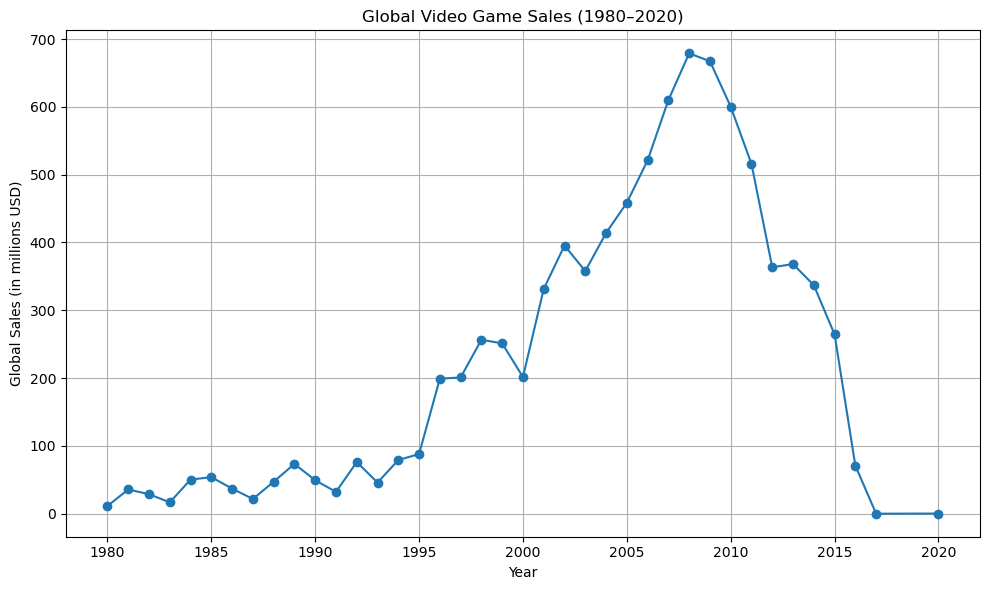

In [34]:
plt.figure(figsize=(10,6))
plt.plot(global_sales_by_year.index, global_sales_by_year.values, marker='o')
plt.title("Global Video Game Sales (1980–2020)")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
genre_decade = df.groupby(['Genre', 'Decade'])['Global_Sales'].sum().unstack()

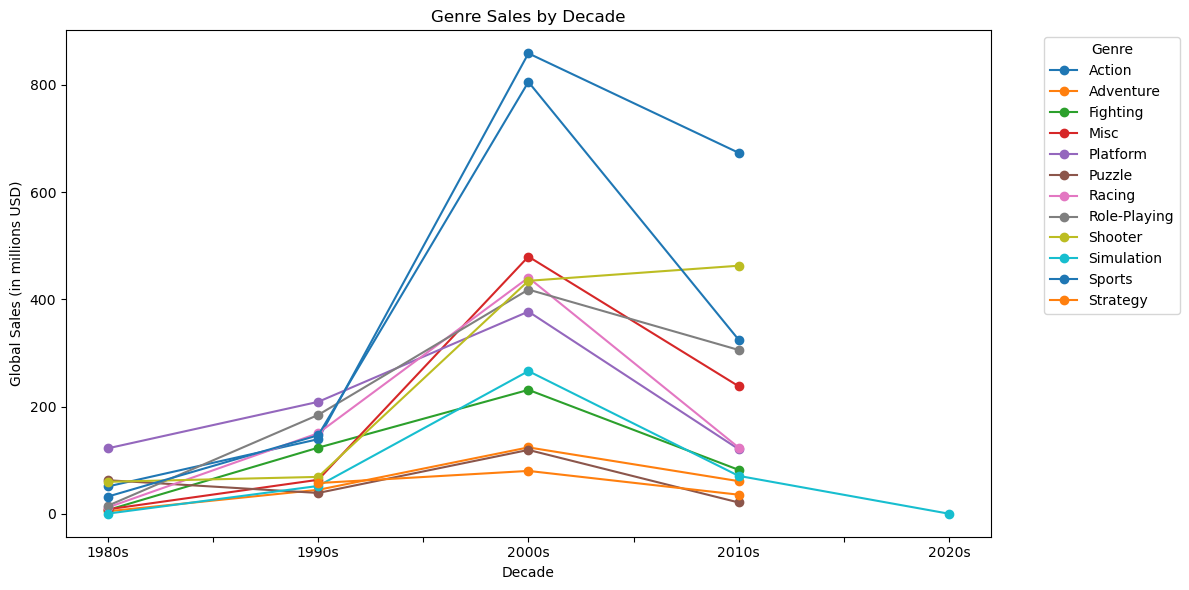

In [36]:
genre_decade.T.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Genre Sales by Decade")
plt.xlabel("Decade")
plt.ylabel("Global Sales (in millions USD)")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
top_10_years = global_sales_by_year.sort_values(ascending=False).head(10)

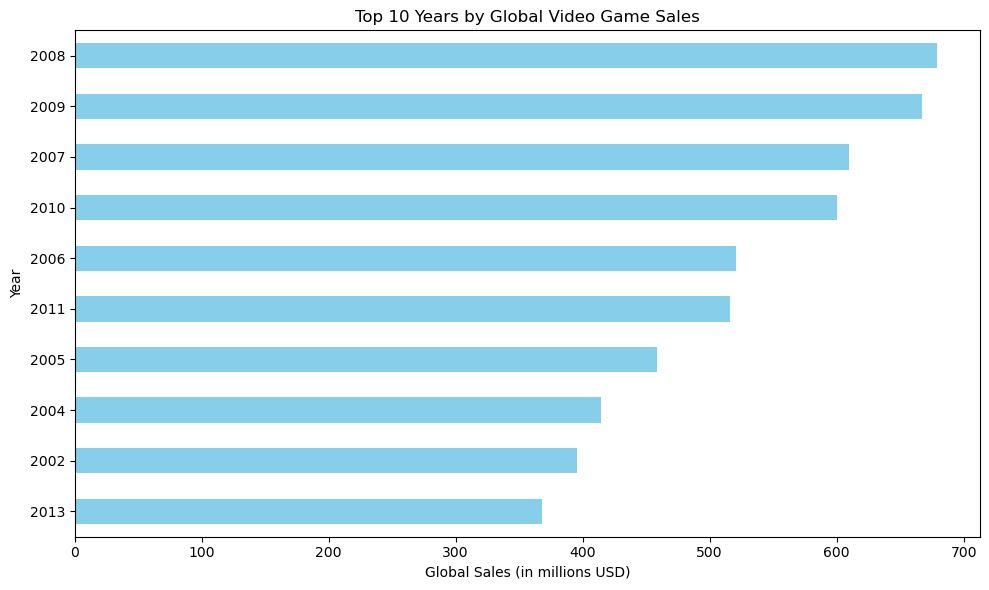

In [38]:
plt.figure(figsize=(10,6))
top_10_years.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Years by Global Video Game Sales")
plt.xlabel("Global Sales (in millions USD)")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [41]:
regional_sales = df.groupby('Genre')[['North_America_Sales', 'Europe_Sales', 'Japan_Sales']].sum().sort_values('North_America_Sales', ascending=False)

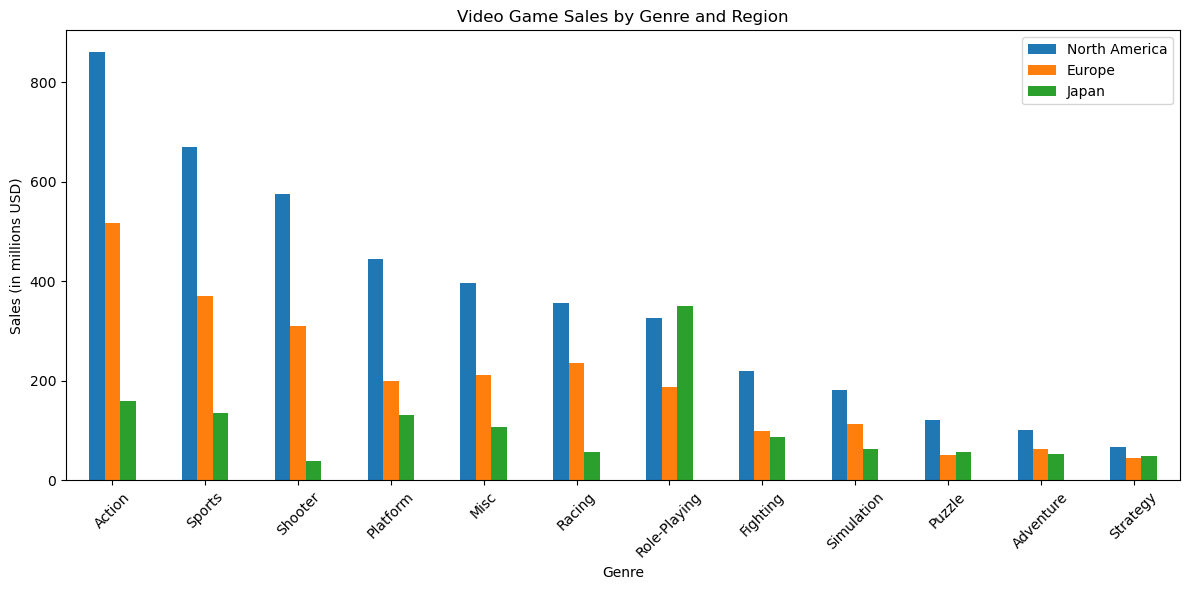

In [42]:
regional_sales.plot(kind='bar', figsize=(12,6))
plt.title("Video Game Sales by Genre and Region")
plt.xlabel("Genre")
plt.ylabel("Sales (in millions USD)")
plt.xticks(rotation=45)
plt.legend(["North America", "Europe", "Japan"])
plt.tight_layout()
plt.show()

In [43]:
top_genres = df['Genre'].value_counts().nlargest(6).index
filtered_df = df[df['Genre'].isin(top_genres)]

In [44]:
genre_year = filtered_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

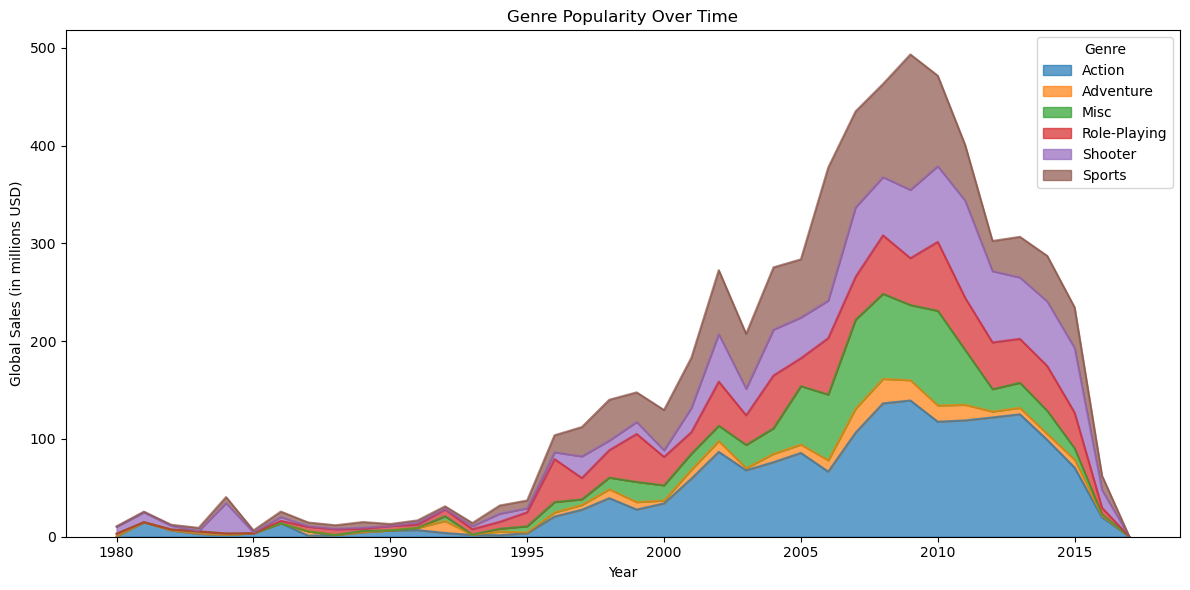

In [45]:
genre_year.plot(kind='area', figsize=(12,6), alpha=0.7)
plt.title("Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions USD)")
plt.tight_layout()
plt.show()

In [46]:
import seaborn as sns

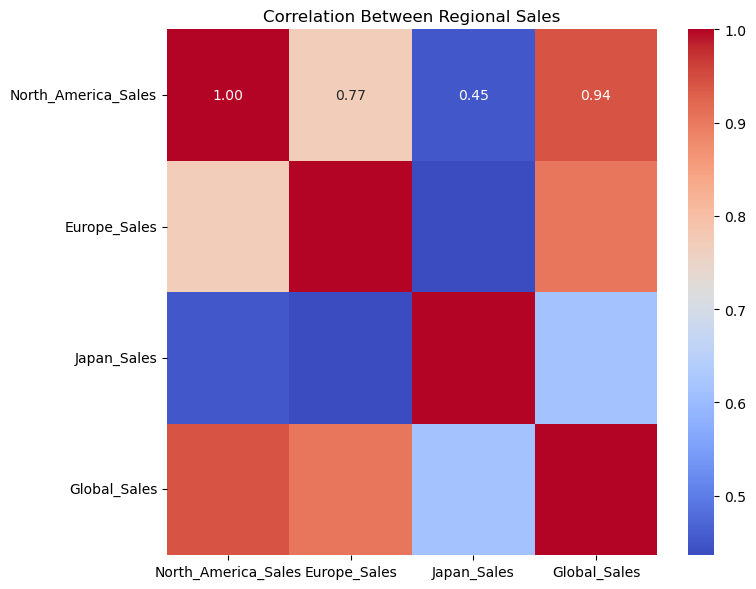

In [51]:
region_sales = df[['North_America_Sales', 'Europe_Sales', 'Japan_Sales', 'Global_Sales']]
plt.figure(figsize=(8,6))
sns.heatmap(region_sales.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Regional Sales")
plt.tight_layout()
plt.show()

In [52]:
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

In [53]:
top_platforms = df['Platform'].value_counts().nlargest(10).index
platform_genre_sales = platform_genre_sales.loc[top_platforms]

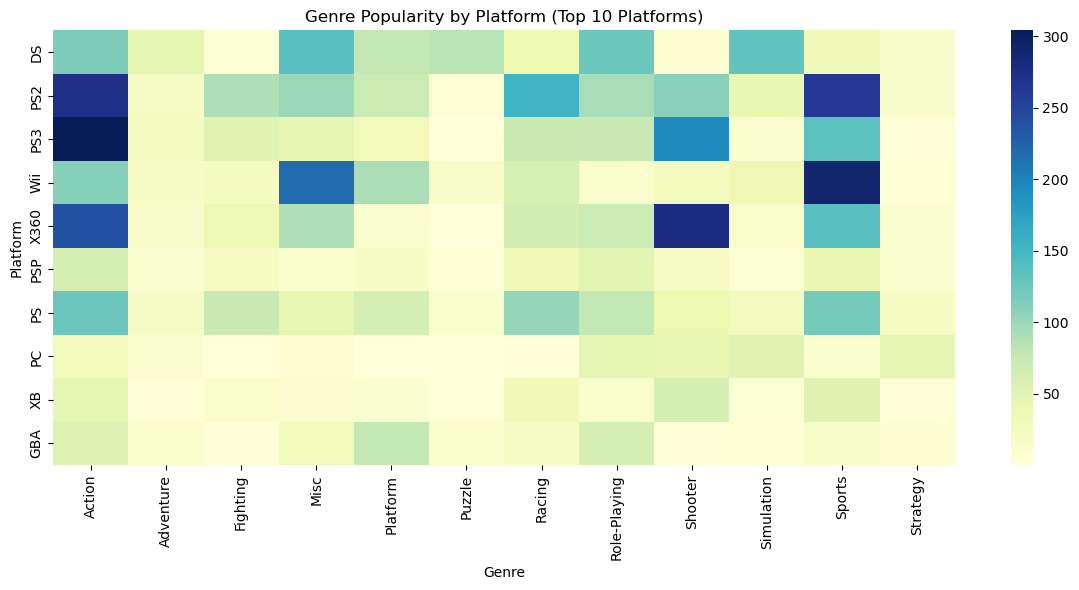

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(platform_genre_sales, cmap="YlGnBu")
plt.title("Genre Popularity by Platform (Top 10 Platforms)")
plt.xlabel("Genre")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

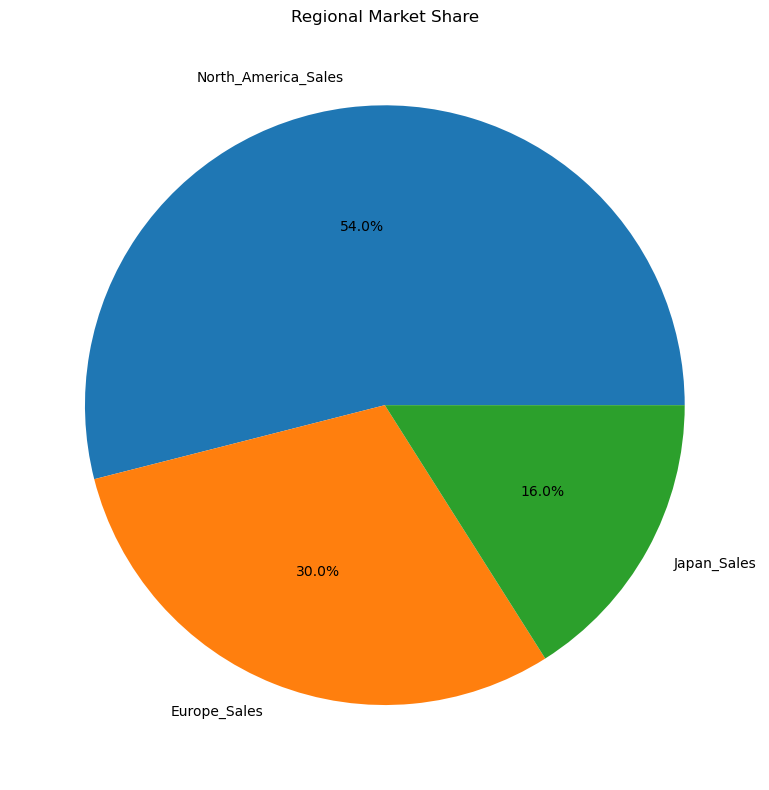

In [56]:
region_totals = df[['North_America_Sales', 'Europe_Sales', 'Japan_Sales']].sum()
region_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title("Regional Market Share")
plt.ylabel("")
plt.tight_layout()
plt.show()